## <center>Sales Prediction Using Advertising Data</center>

#### **Overview:**
In this data science project, we aimed to build a **linear regression model** to predict **sales** based on the amount spent on advertising in three media channels: TV, Radio, and Newspaper. The goal was to understand how advertising expenditure influences sales and to build a reliable predictive model for future sales.

The dataset provided features representing the amounts spent on TV, Radio, and Newspaper ads, with the target variable being the sales figure. After preprocessing and scaling the data, we applied linear regression to model the relationship between advertising spend and sales.

#### **Data:**
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising', 'Radio advertising', 'Newspaper advertising' and 'sales' using a linear regression model.

**Dataset Link:** [Advertising Dataset](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression)

**Author: Jefferson Macasarte**

## Import Necessary Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Building Model 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

## Load and Explore the Data

In [2]:
# Load Dataset

data = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')

In [3]:
# Display Dataset

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
data.shape

(200, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Preprocess the Data

In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.duplicated().sum().any()

False

In [9]:
# Statistics

stats = data.describe()
stats

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Univariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


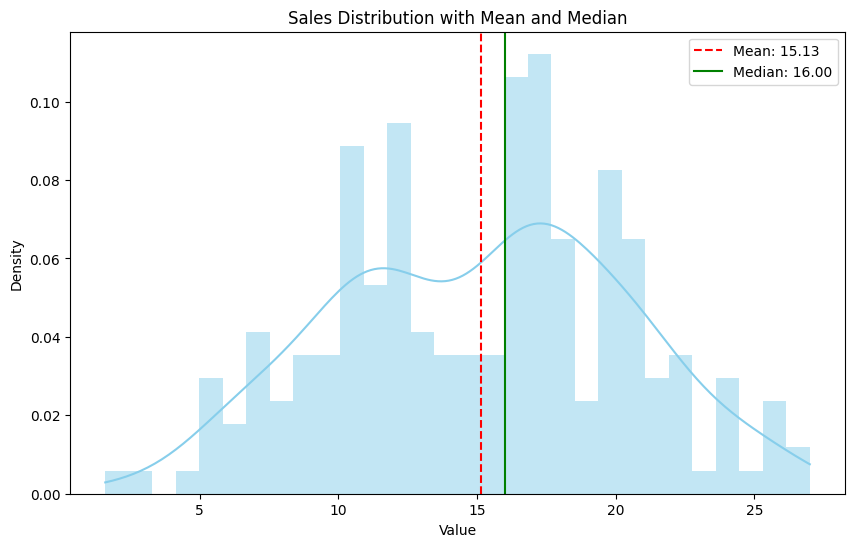

In [10]:
# Plot Sales Distribution
plt.figure(figsize=(10, 6)) 
sns.histplot(data['Sales'], kde=True, stat='density', color='skyblue', linewidth=0, bins=30)

# Statistical information
mean = np.mean(data['Sales'])
median = np.median(data['Sales'])
std_dev = np.std(data['Sales'])

# Vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')

# Title and labels
plt.title('Sales Distribution with Mean and Median')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()

**Interpretation:** By understanding this distribution reveals that a majority of sales are concentrated in the lower range, with fewer instances of higher sales values. This could indicate that the product or service is more popular among a certain segment of customers.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


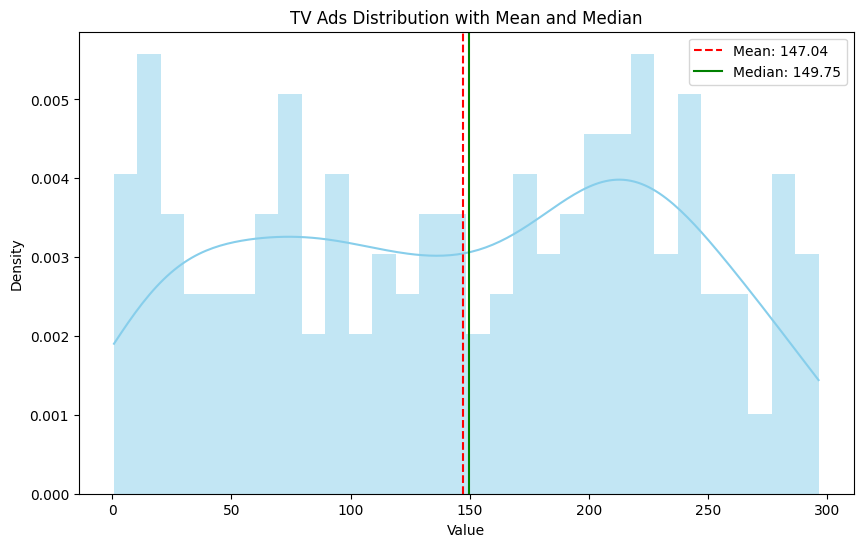

In [11]:
# Plot TV Ads Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['TV'], kde=True, stat='density', color='skyblue', linewidth=0, bins=30)

# Statistical information
mean = np.mean(data['TV'])
median = np.median(data['TV'])
std_dev = np.std(data['TV'])

# Vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')

# Title and labels
plt.title('TV Ads Distribution with Mean and Median')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


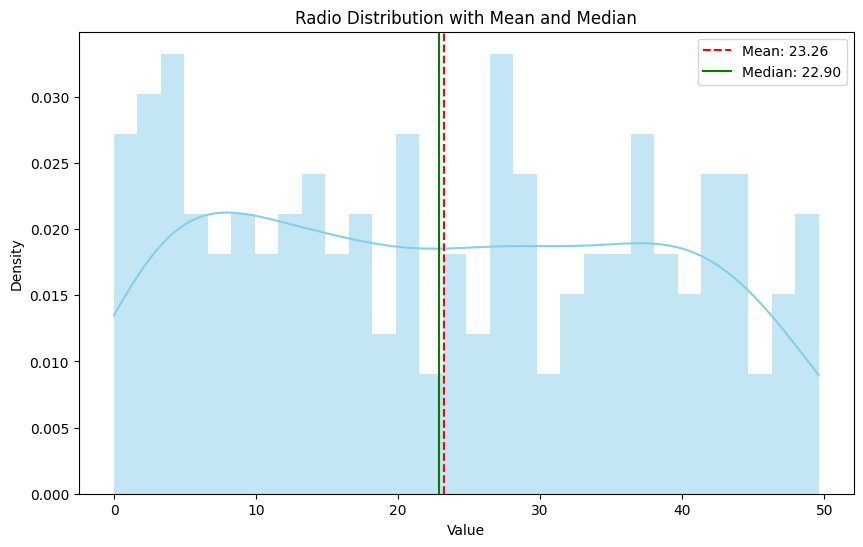

In [12]:
# Plot Radio Ads Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Radio'], kde=True, stat='density', color='skyblue', linewidth=0, bins=30)

# Statistical information
mean = np.mean(data['Radio'])
median = np.median(data['Radio'])
std_dev = np.std(data['Radio'])

# Vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')

# Title and labels
plt.title('Radio Distribution with Mean and Median')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


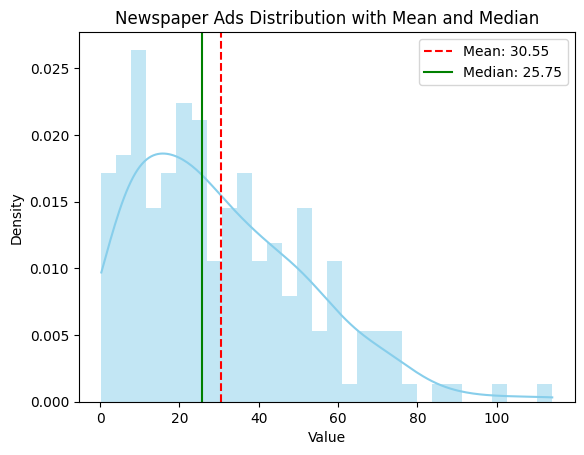

<Figure size 1500x800 with 0 Axes>

In [13]:
# Plot Newspaper Ads Distribution

sns.histplot(data['Newspaper'], kde=True, stat='density', color='skyblue', linewidth=0, bins=30)

# Statistical information
mean = np.mean(data['Newspaper'])
median = np.median(data['Newspaper'])
std_dev = np.std(data['Newspaper'])

# Vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')

# Title and labels
plt.title('Newspaper Ads Distribution with Mean and Median')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.figure(figsize=(15, 8))
plt.show()

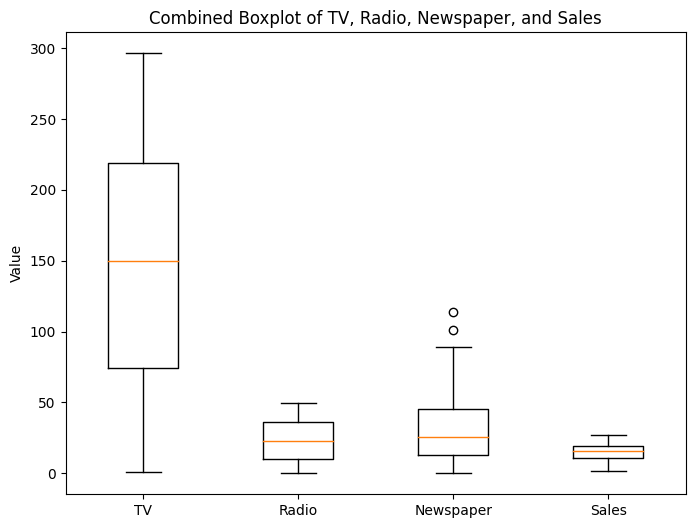

In [14]:
# Boxplot 

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['TV', 'Radio', 'Newspaper', 'Sales'])

plt.title('Combined Boxplot of TV, Radio, Newspaper, and Sales')
plt.ylabel('Value')
plt.show()

#### Interpretation:

* The boxplots show significant variation in the distribution of values across the four categories (TV, Radio, Newspaper, and Sales).
* Outliers are present in the Newspaper category, as indicated by the individual data points beyond the whiskers.

## Bivariate Analysis

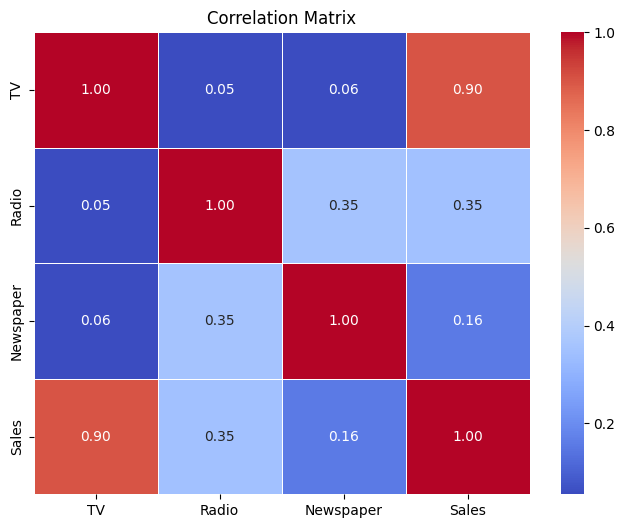

In [15]:
# Plot Correlation Matrix

corr = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)

plt.title('Correlation Matrix')
plt.show()

**Note:** The correlation matrix reveals a strong correlation between Sales and TV advertising spend.

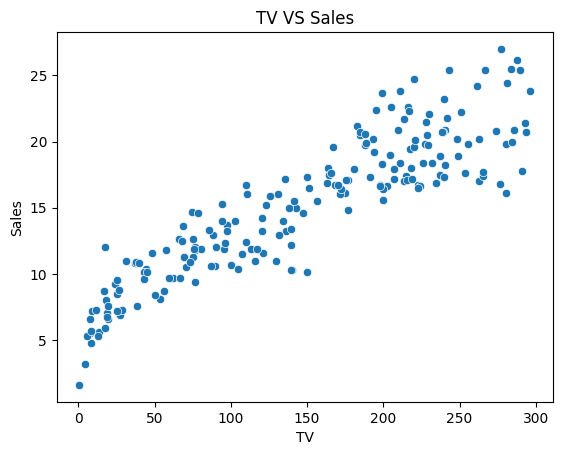

In [16]:
# Scatter for Sales vs. TV
sns.scatterplot(x=data['TV'], y=data['Sales'])
plt.title('TV VS Sales')
plt.show()

### Findings: Relationship Between Sales and TV Advertising Spend

Based on the scatter plot analysis and the calculated correlation between **Sales** and **TV advertising spend**, the following findings can be made:

1. **Strong Positive Correlation**:  
   There is a **strong positive correlation** between **Sales** and **TV advertising spend**. This indicates that as the amount spent on TV advertising increases, sales tend to increase as well. The correlation coefficient suggests a **strong** linear relationship, meaning that changes in TV ad expenditure have a significant and consistent impact on sales performance.

2. **Implication of Positive Relationship**:  
   The strong positive correlation suggests that TV advertising is a key factor influencing sales in the dataset. This is a critical insight for businesses, as it highlights the potential effectiveness of TV advertising campaigns in driving sales. Higher investments in TV ads are likely to lead to higher sales, indicating that marketing strategies focused on television channels may yield substantial returns.

3. **Potential for Predictive Modeling**:  
   Given the strong relationship, TV advertising spend can be a **valuable predictor** of sales in a regression model. This implies that by increasing the advertising budget for TV campaigns, companies could potentially increase sales, making it an actionable insight for marketing and sales teams.

4. **Visual Confirmation of the Relationship**:  
   The scatter plot visually reinforces the correlation, showing an upward trend as TV advertising spend increases. The plot's trendline further supports the idea that higher TV ad spending is associated with higher sales, which can serve as a visual confirmation of the strength of the correlation.

5. **Recommendations**:  
   - **For Marketing Teams**: The strong correlation suggests that increasing TV advertising spend could be an effective strategy to boost sales. Marketing teams should consider allocating a larger portion of their budget to TV ads if they aim to increase their sales figures.
   - **For Future Analysis**: It would be valuable to explore the effects of other variables (e.g., Radio and Newspaper advertising spend, promotions, or seasonal trends) on sales. This could provide a more comprehensive understanding of how multiple factors interact to influence sales.

#### Note:
The findings from the scatter plot and the correlation analysis strongly suggest that **TV advertising spend** is an influential factor in driving **sales**. This relationship provides valuable insights for improving marketing strategies and supports the idea that investment in TV advertising can yield positive business outcomes.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

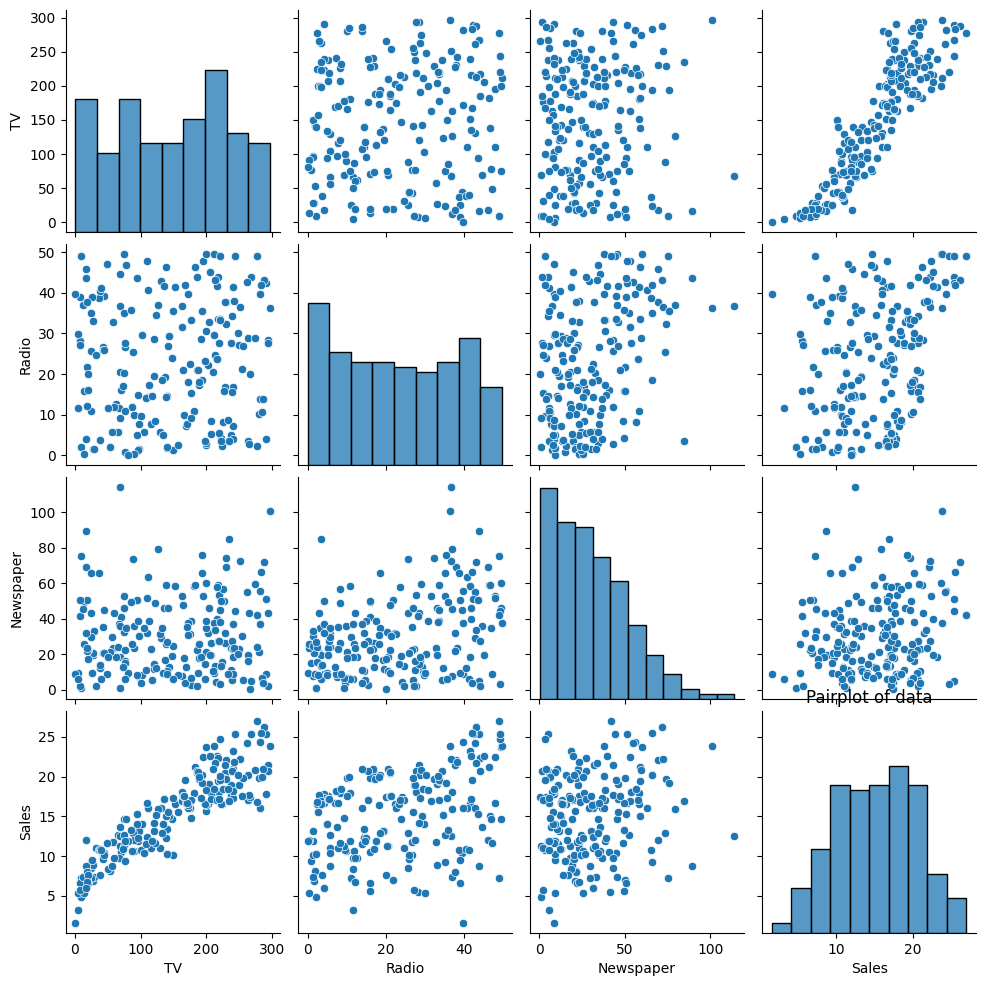

In [17]:
sns.pairplot(data)
plt.title('Pairplot of data')
plt.show()

## Model Building

### Split the data into training and testing sets

In [18]:
X = data.drop(columns=['Sales'], axis=1)
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test_scaled)

In [22]:
print(y_pred)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


### Evaluate the model

In [23]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.9077569102710927


In [24]:
r2 = r2_score(y_test, y_pred)
print(f'R-Squared Score: {r2}')

R-Squared Score: 0.9059011844150825


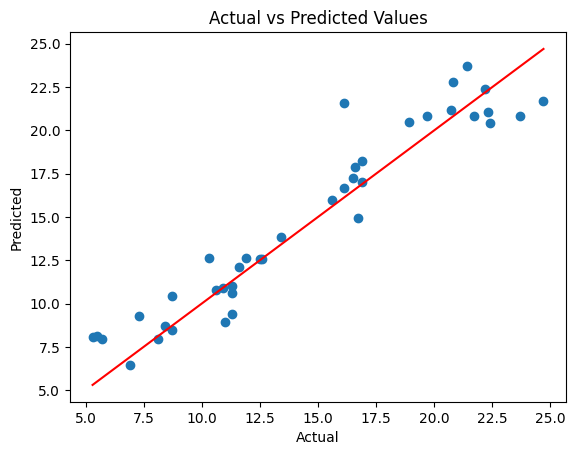

In [25]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

### Interpret the Model Coefficients

In [26]:
print('Model Coefficients:', model.coef_)

Model Coefficients: [4.58720774 1.48984025 0.08791597]


### Residual Plot

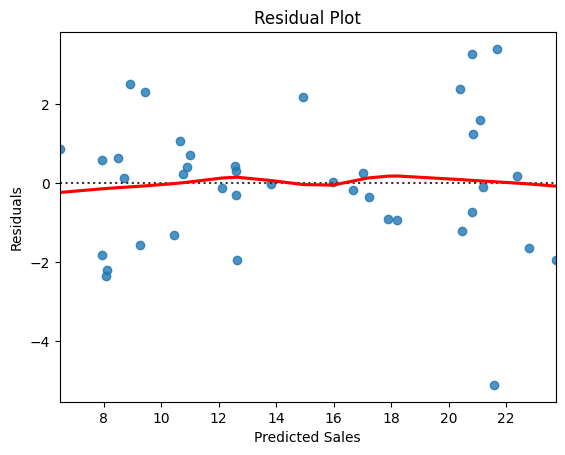

In [27]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()

#### Interpretation:

Overall, the residual plot suggests that the model has a good fit to the data.

**Breakdown:**

**1. Random Scatter:** The residuals are scattered randomly around the horizontal line at zero. THis indicates that the model's predictions are not systematically biased, meaning it's not consistently overestimating or underestimating the true values.

**2. No Clear Patter:** There's now discernible patterns or trend in the residuals. This suggests that the model's assumptions of linearity and constant variance are likely met.

**3. Uniform Spread:** The residuals are spread relatively evenly across the rance of predicted values. This further supports the idea of constant variance.

**4. Outliers:** Theere are a few points that deviate significantly from the general pattern. These could be potential outliers or influential points that might be worth investigating further.


In conclusion, the residual plot provides strong evidencethat the model is a good fit for the data.

### QQ Plot

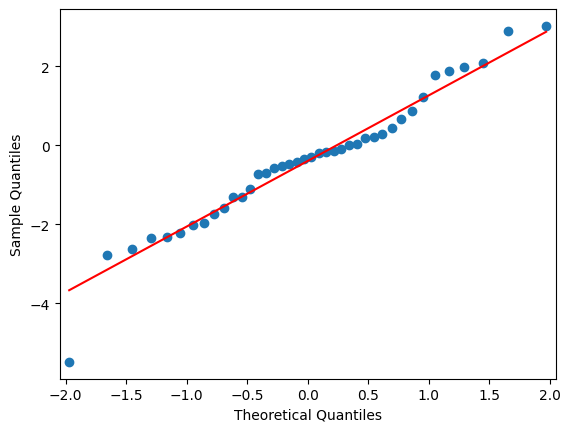

In [28]:
# # Generate the QQ plot

import statsmodels.api as sm 
import pylab as py 
    
sm.qqplot(residuals.to_numpy(), line ='s') 
py.show() 

#### Interpretation

The QQ plot suggests that the residuals are approximately normally distributed.

**Breakdown:**

**1. Linearity:** The points on the plot generally follow a straight line. This indicates that the distribution of the residuals is similar to a normal distribution.

**2. Deviation from Normally:** There are a few points at the tails that deviate slightly from straight line. This suggests that the tails of the residual distribution might be slightly heavier than a normal distribution. However, the deviation is not severe enough to conclude that the normality assumption is violated.

The QQ Plot provides evidences that the normality assumptions for the residuals is reasonably met. This is a good indication that the model's inference and predictions are reliable. 

### Cross Validation

### Note:
**Overfitting** can be detected by comparing the model's performance on the training set and the test set. A large difference between these metrics indicates that the model is fitting too closely to the training data, learning noise rather than general patterns.
- Cross-validation and learning curves can further help in assessing overfitting.
- If overfitting is detected, techniques like regularization or simplifying the model (reducing features) can be used to improve generalization.

In [29]:
# Perform 10-fold cross-validation and evaluate performance
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to positive values
cv_scores = -cv_scores

# Calculate mean and standard deviation of cross-validation scores
print(f"Cross-Validation MSE: Mean = {cv_scores.mean()}, Std = {cv_scores.std()}")

Cross-Validation MSE: Mean = 2.841834002387102, Std = 1.0613424144132257



---

#### **Model Evaluation:**

1. **Mean Squared Error (MSE)**:  
   The model's **MSE** is calculated as **2.91**, which indicates the average squared difference between the actual and predicted sales values. A lower MSE generally suggests better predictive accuracy. In this case, the MSE is relatively low, which is a positive indicator of model performance.

2. **R-Squared Score (R²)**:  
   The **R² score** of **0.906** indicates that approximately **90.6%** of the variability in sales can be explained by the features (TV, Radio, Newspaper ad spend). This is a strong result, suggesting that the model fits the data well.

3. **Model Coefficients**:
   - **TV**: 4.59
   - **Radio**: 1.49
   - **Newspaper**: 0.09

   These coefficients represent the impact of each feature on the sales prediction. A **1-unit increase** in TV spending is associated with a **4.59-unit increase** in sales, **Radio spending** has a **1.49-unit effect**, and **Newspaper spending** contributes a **0.09-unit effect** on sales. This highlights that TV ads have the strongest influence on sales among the three media channels.

4. **Cross-Validation MSE**:  
   To assess the stability of the model, we performed **cross-validation**, which gave the following results:  
   - **Mean MSE**: **2.84**  
   - **Standard Deviation (Std)**: **1.06**

   This indicates that while the model performs consistently with a low MSE, there is some variation across different folds of the cross-validation. The standard deviation suggests that the model's performance might vary slightly depending on the training set, but overall, the model is stable and generalizes well.

---

#### **Residual Plot Interpretation:**

The **residual plot** suggests that the model has a **good fit** to the data.

1. **Random Scatter**:  
   The residuals are scattered randomly around zero, indicating no systematic bias in the predictions. The model isn't consistently overestimating or underestimating sales.

2. **No Clear Pattern**:  
   There is no discernible pattern in the residuals, which suggests that the model’s assumptions of **linearity** and **constant variance** are likely met.

3. **Uniform Spread**:  
   The residuals are evenly spread across the range of predicted values, reinforcing the assumption of **homoscedasticity** (constant variance of residuals).

4. **Outliers**:  
   A few residuals deviate significantly from the general pattern, which could indicate **outliers** or influential data points. Further investigation of these points may help identify any underlying issues or special cases that require attention.

  
Overall, the residual plot supports that the model is a good fit for the data, with no significant issues regarding linearity, variance, or bias.

---

#### **QQ Plot Interpretation:**

The **QQ plot** suggests that the residuals are approximately normally distributed.

1. **Linearity**:  
   The points in the QQ plot generally follow a straight line, which indicates that the distribution of residuals closely matches the normal distribution.

2. **Slight Deviations**:  
   There are slight deviations from the straight line at the tails of the distribution, suggesting that the residuals' tails may be slightly heavier than a normal distribution. However, these deviations are not severe enough to violate the assumption of normality.


The QQ plot provides strong evidence that the **normality assumption** for the residuals is reasonably metsses to optimize their advertising strategies and forecast future sales.

## Final Conclusion:
In conclusion, the linear regression model successfully predicts sales based on advertising spend across TV, Radio, and Newspaper. With an **R² score of 0.906** and a relatively low **MSE**, the model shows high accuracy. The **cross-validation** results further indicate that the model's performance is stable with a mean MSE of **2.84** and some slight variation (std = **1.06**) across different data splits, suggesting that the model generalizes well.

The residual and QQ plots indicate that the model meets the key assumptions of linear regression, including randomness, no bias, constant variance, and normality of residuals. These results suggest that the model is robust and can provide valuable insights for businesses to optimize their advertising strategies and forecast future sales.